In [138]:
library(tidyverse)
library(ggplot2)
library(caret)
library(dplyr)
library(haven)
library(ISLR)
library(corrplot)
library(rpart)
library(corrgram)
library(xgboost)

In [139]:
#getting the data 
bank <- read.csv(file="/Users/kj/Desktop/DATA ANALYTICS/Projects /DMML-1 Sem1/Datasets/bank.csv", header=TRUE)

In [140]:
#checking the dimension of the data
dim(bank)

[1] 11162    17

In [111]:
#Checking the null values
colSums(is.na(bank))


age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
  deposit 
        0

In [112]:
bank$job <- as.factor(bank$job)
bank$marital <- as.factor(bank$marital)
bank$education <- as.factor(bank$education)
bank$housing <- as.factor(bank$housing)
bank$loan <- as.factor(bank$loan)
bank$deposit <- as.factor(bank$deposit)
bank$poutcome <- as.factor(bank$poutcome)
bank$default <- as.factor(bank$default)
bank$contact <- as.factor(bank$contact)
bank$month <- as.factor(bank$month)
bank$day <- as.factor(bank$day)


       no       yes 
0.5261602 0.4738398 

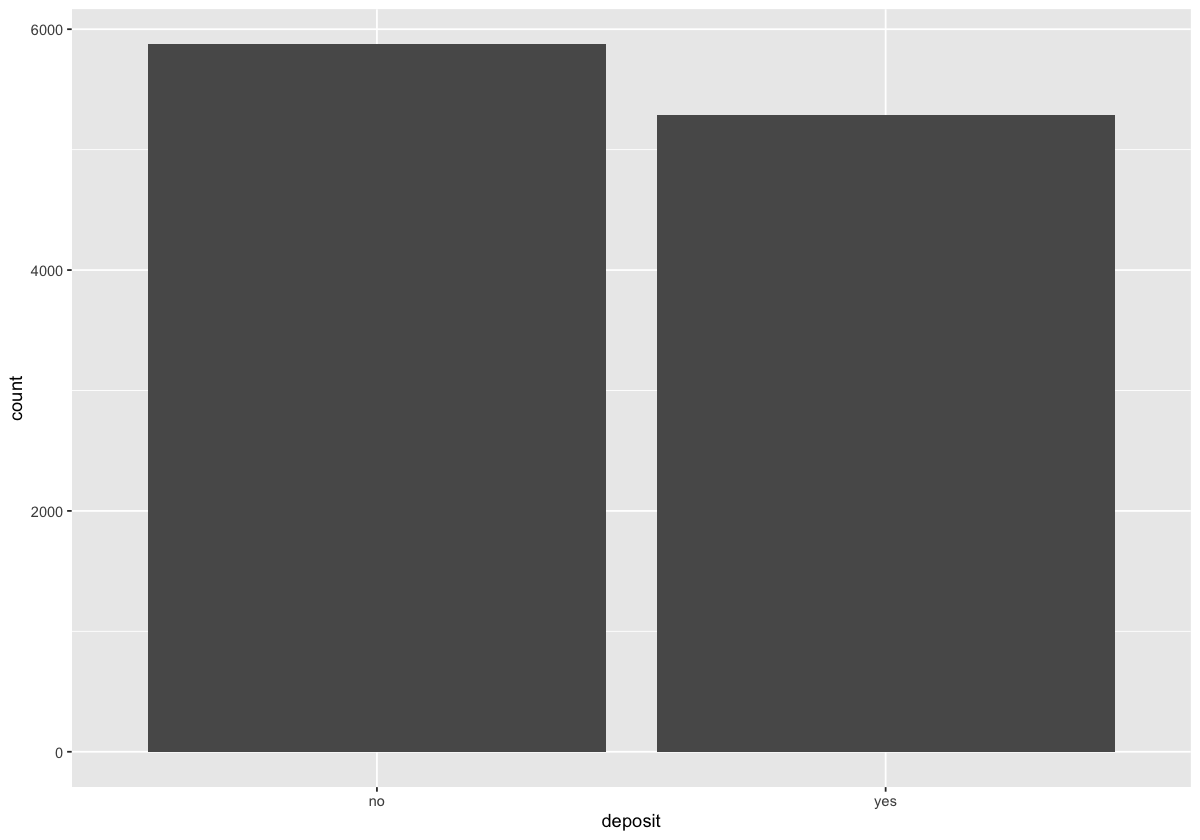

In [144]:
ggplot(bank,aes(x=deposit))+geom_bar()
prop.table(table(bank$deposit)) 

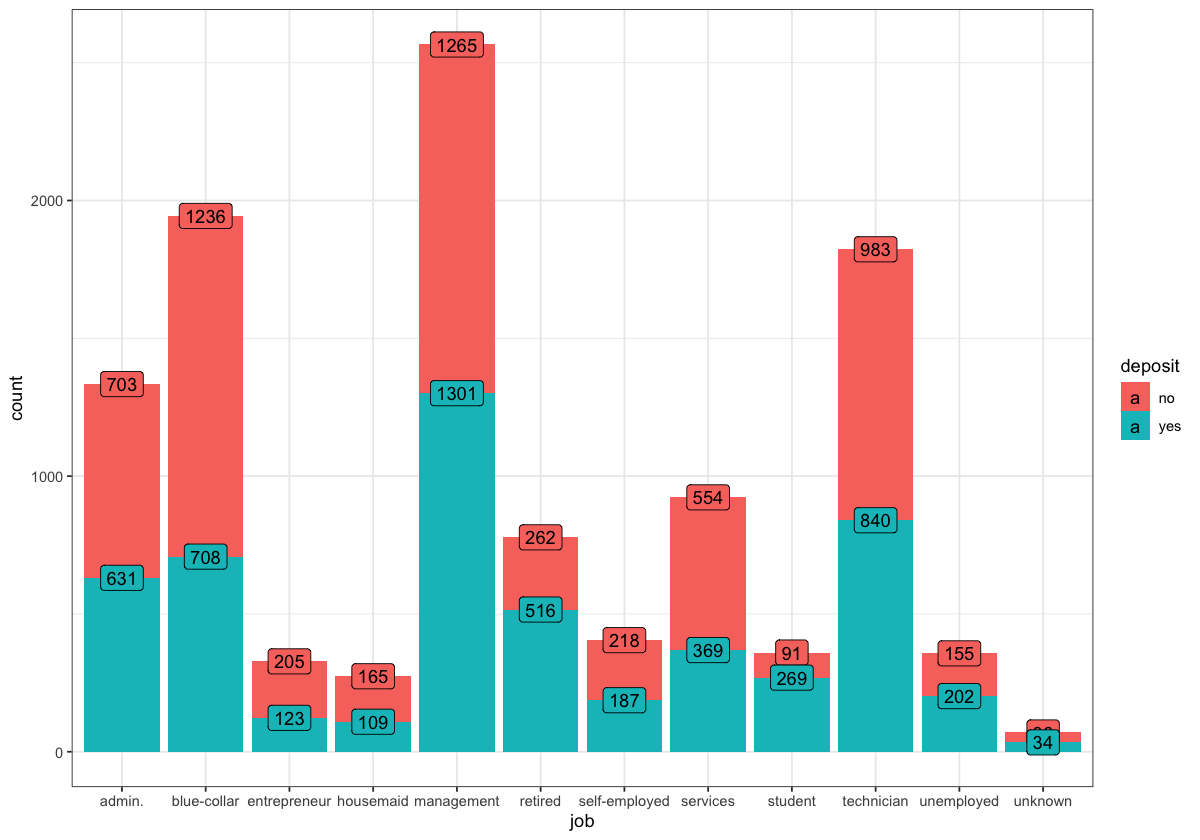

In [114]:
options(repr.plot.width=10, repr.plot.height=07)
ggplot(bank,aes(x=job,fill=deposit))+theme_bw()+geom_bar()+stat_count(aes(label = ..count..),geom="label")

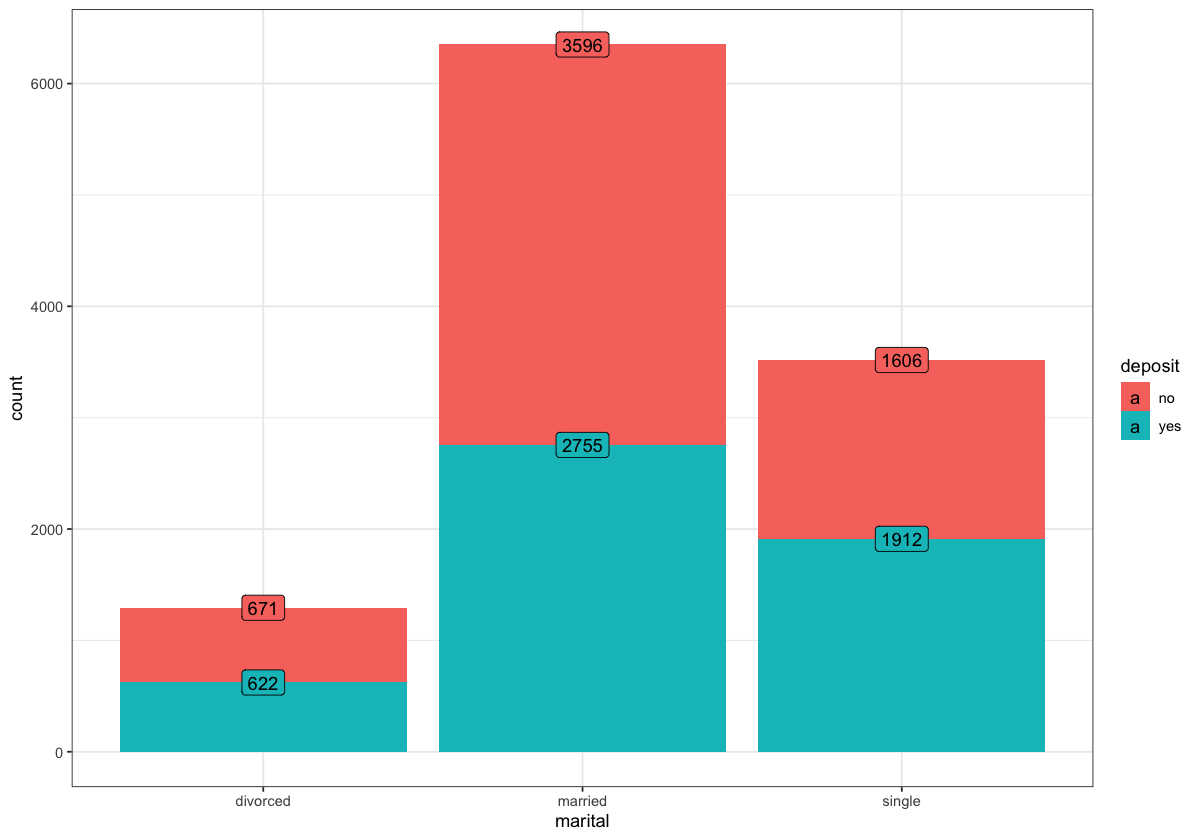

In [115]:
ggplot(bank,aes(x=marital,fill=deposit))+theme_bw()+geom_bar()+stat_count(aes(label = ..count..),geom="label")

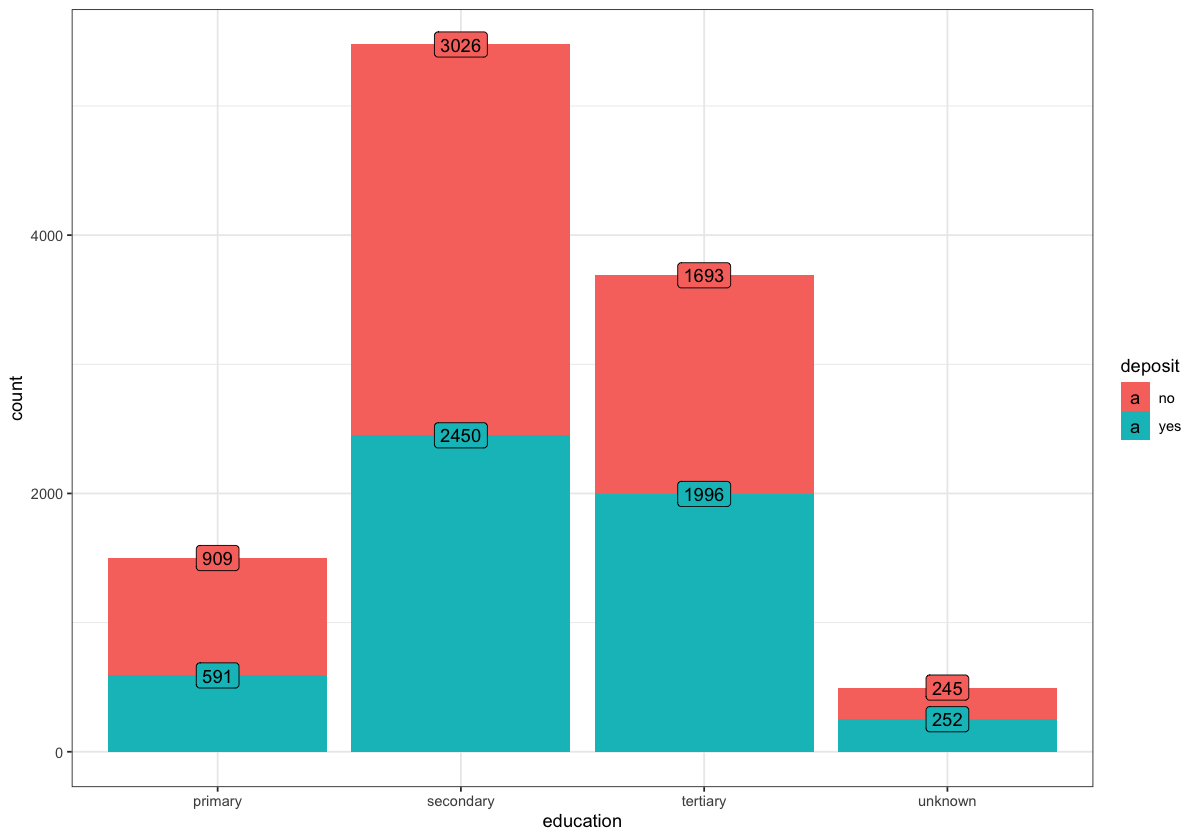

In [116]:
ggplot(bank,aes(x=education,fill=deposit))+theme_bw()+geom_bar()+stat_count(aes(label = ..count..),geom="label")

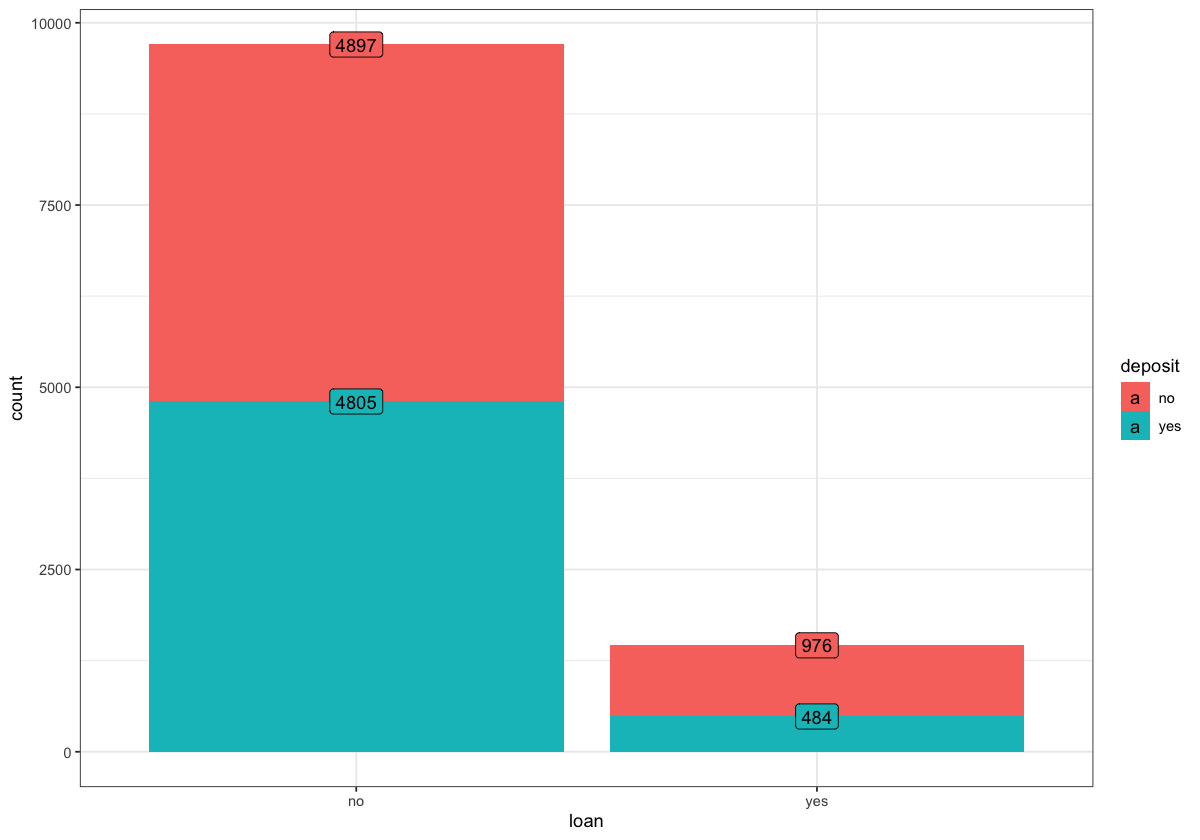

In [117]:
ggplot(bank,aes(x=loan,fill=deposit))+theme_bw()+geom_bar()+stat_count(aes(label = ..count..),geom="label")

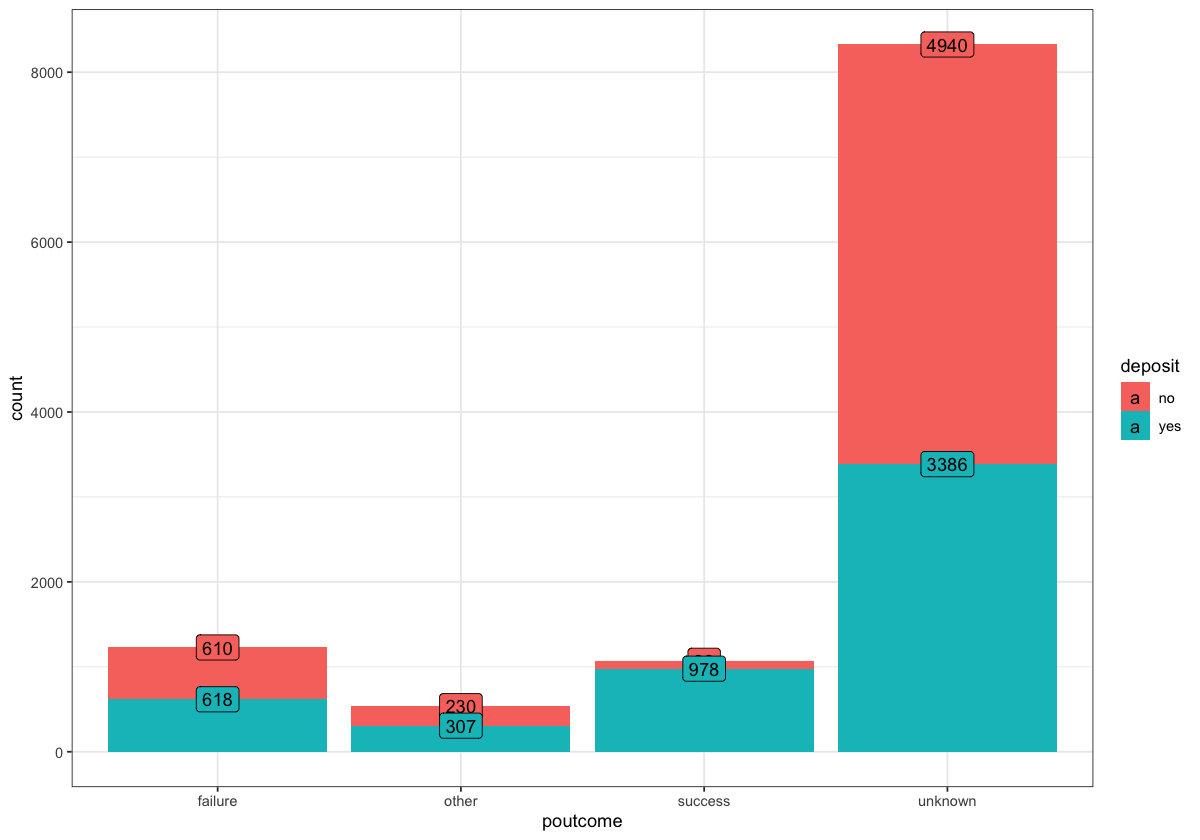

In [118]:
ggplot(bank,aes(x=poutcome,fill=deposit))+theme_bw()+geom_bar()+stat_count(aes(label = ..count..),geom="label")

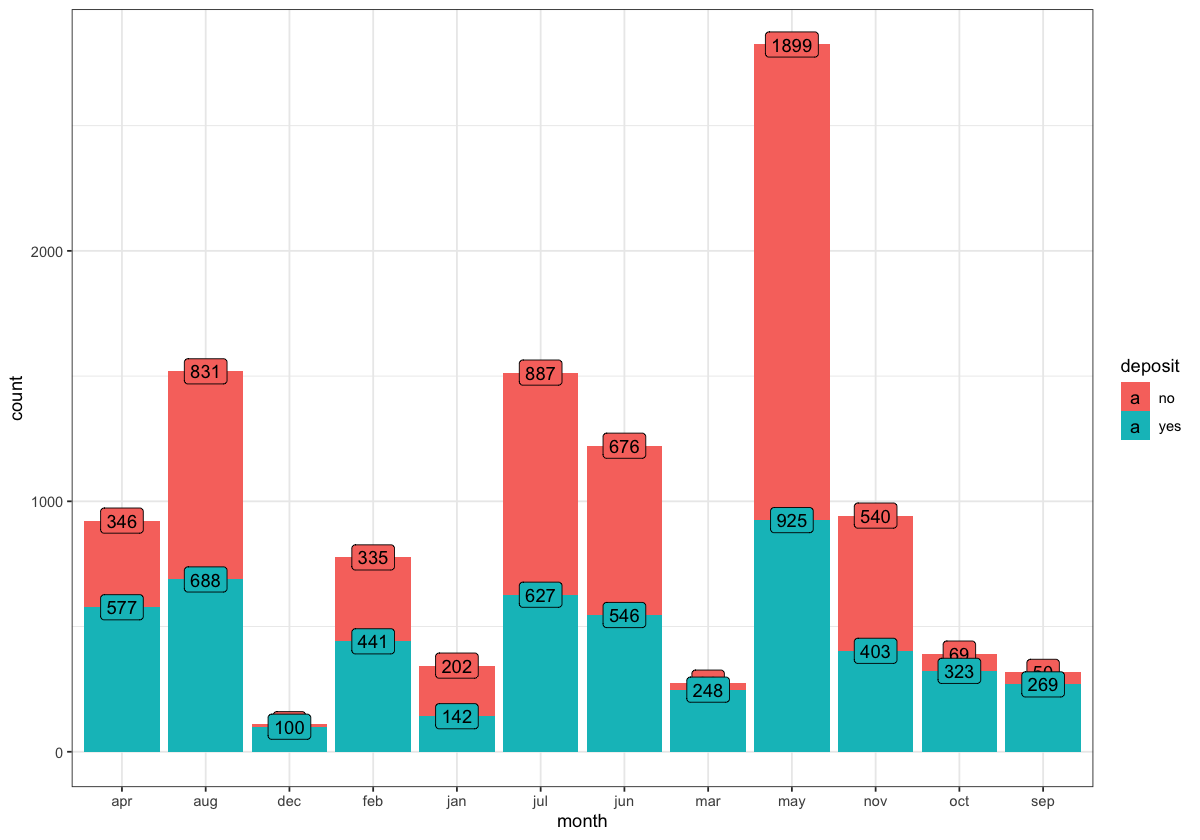

In [119]:
ggplot(bank,aes(x=month,fill=deposit))+theme_bw()+geom_bar()+stat_count(aes(label = ..count..),geom="label")

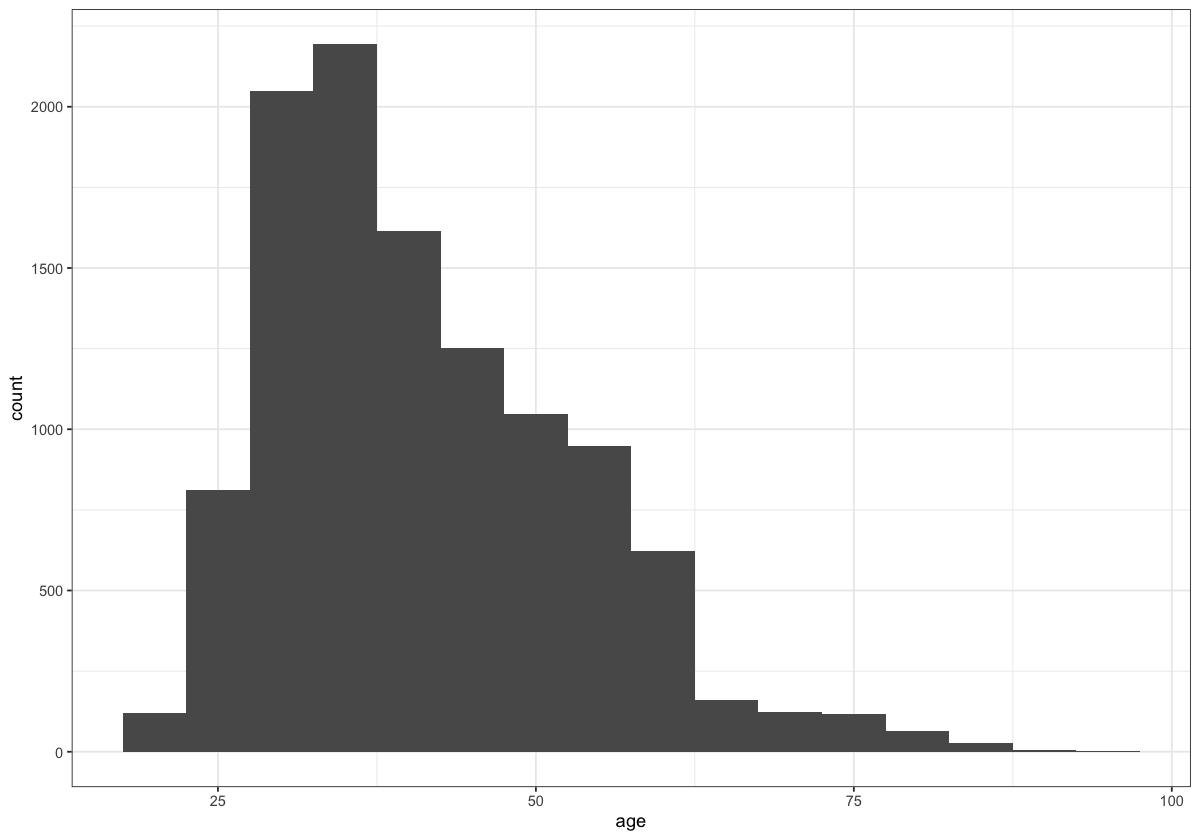

In [120]:
#Distribution of age
ggplot(bank,aes(x=age))+theme_bw()+geom_histogram(binwidth=5)

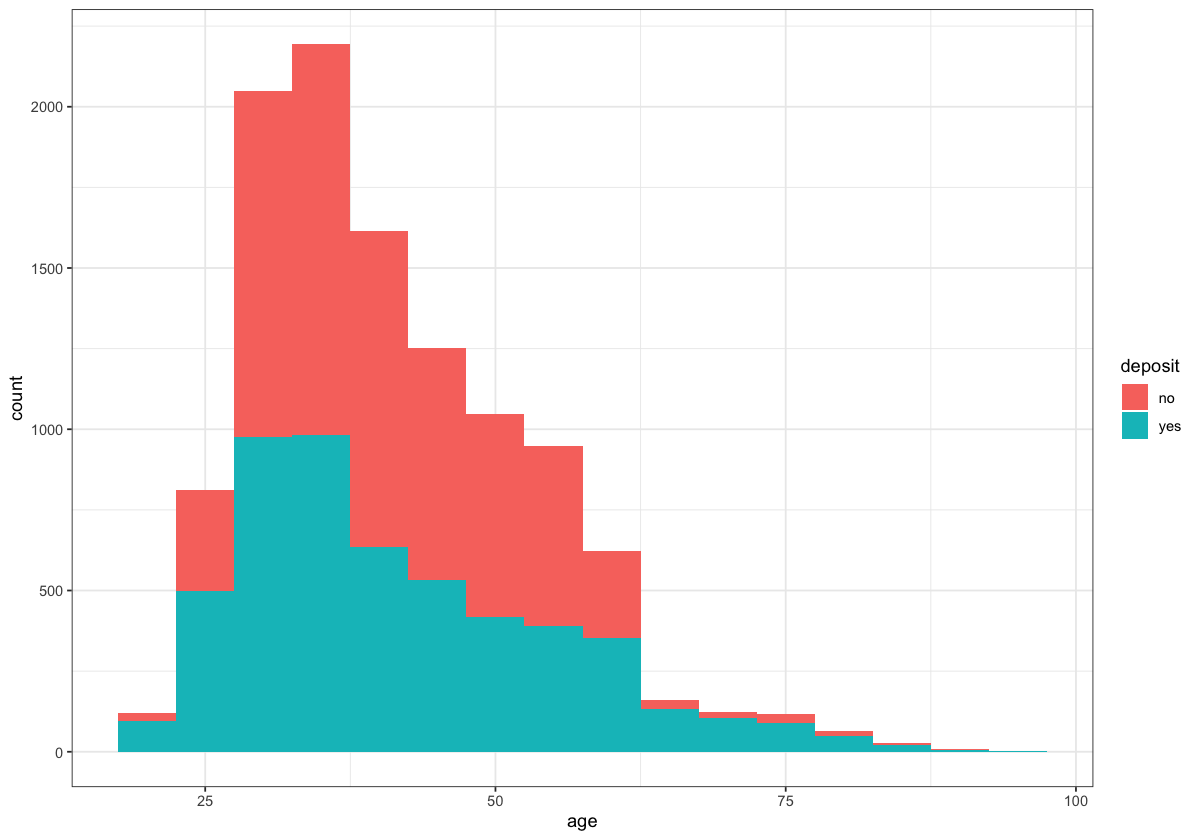

In [121]:
#proportion of age and deposit
ggplot(bank,aes(x=age,fill=deposit))+theme_bw()+geom_histogram(binwidth=5) 

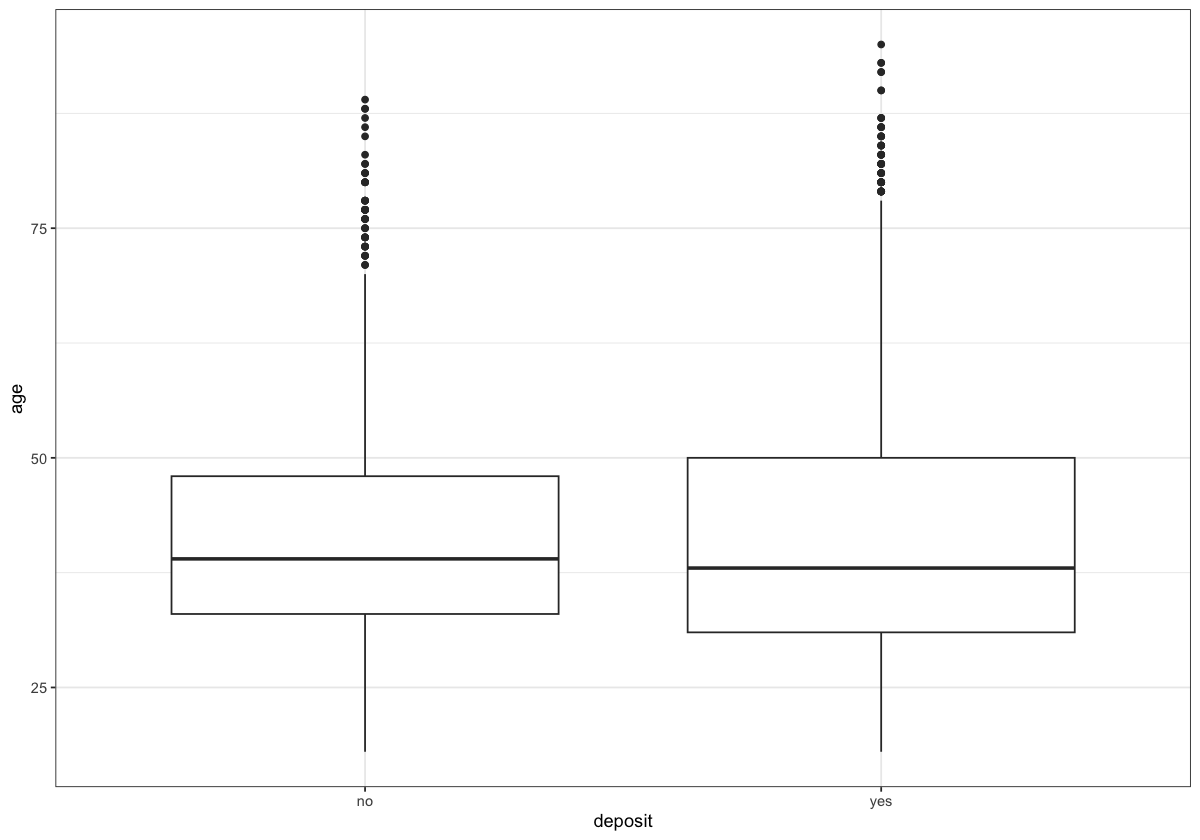

In [122]:
#box plot of age districbution vs deposit
ggplot(bank,aes(x=deposit,y=age))+theme_bw()+geom_boxplot()

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


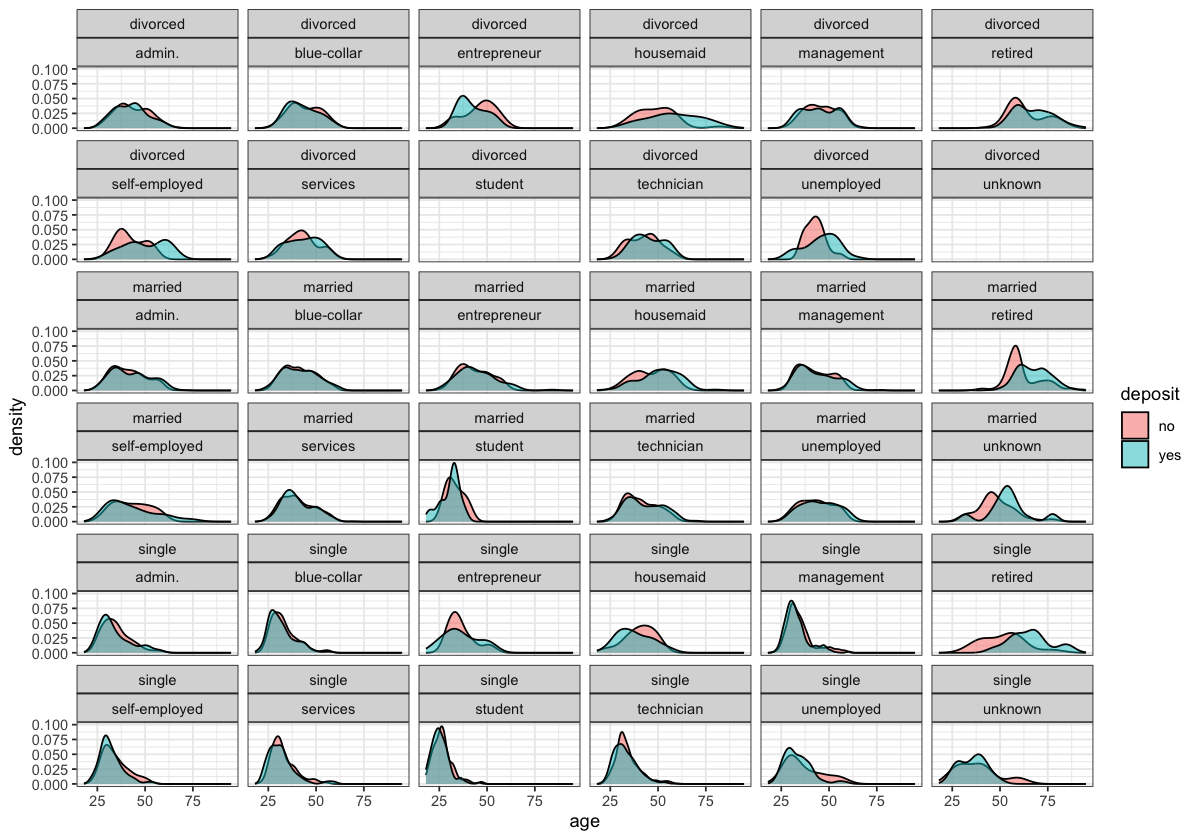

In [123]:
#density plot of Deposit rate, age, job, marital status
ggplot(bank,aes(x=age,fill=deposit))+theme_bw()+facet_wrap(marital ~ job)+geom_density(alpha=0.5)

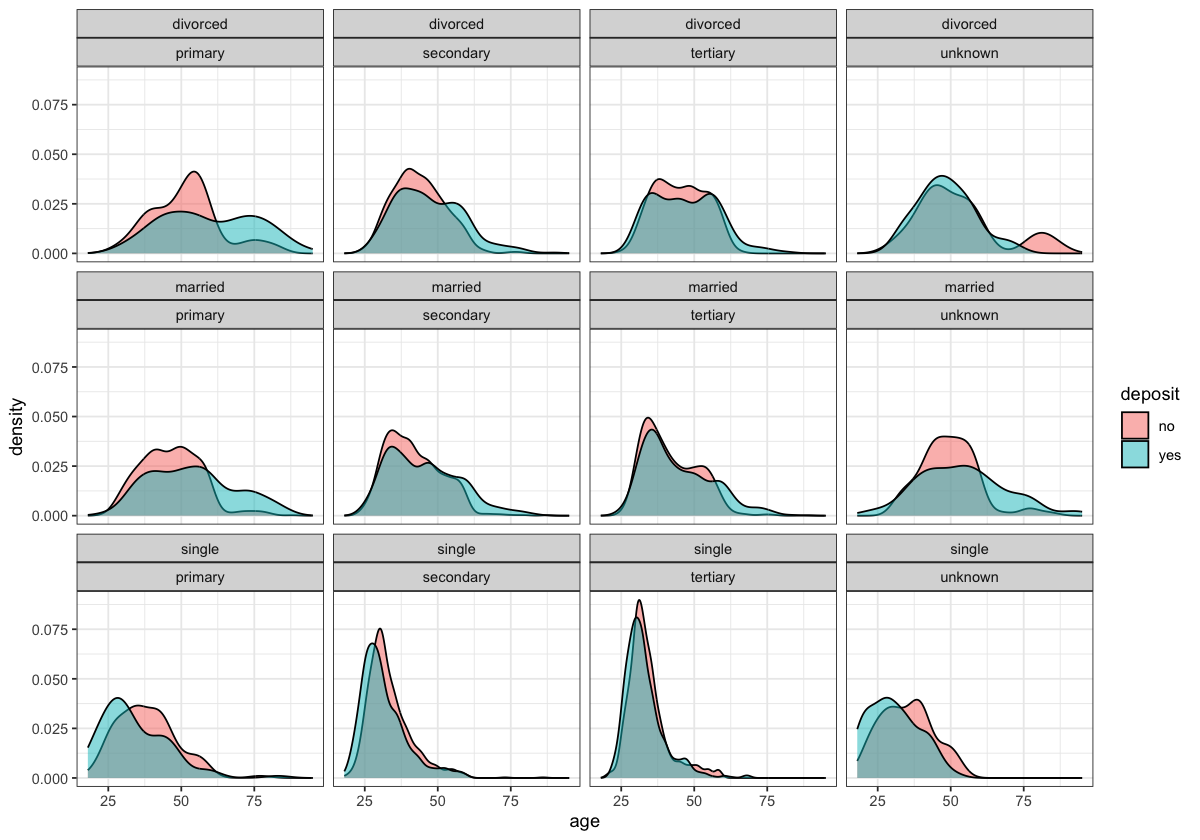

In [124]:
#density plot of Deposit rate, age, education, marital status

ggplot(bank,aes(x=age,fill=deposit))+theme_bw()+facet_wrap(marital ~ education)+geom_density(alpha=0.5)

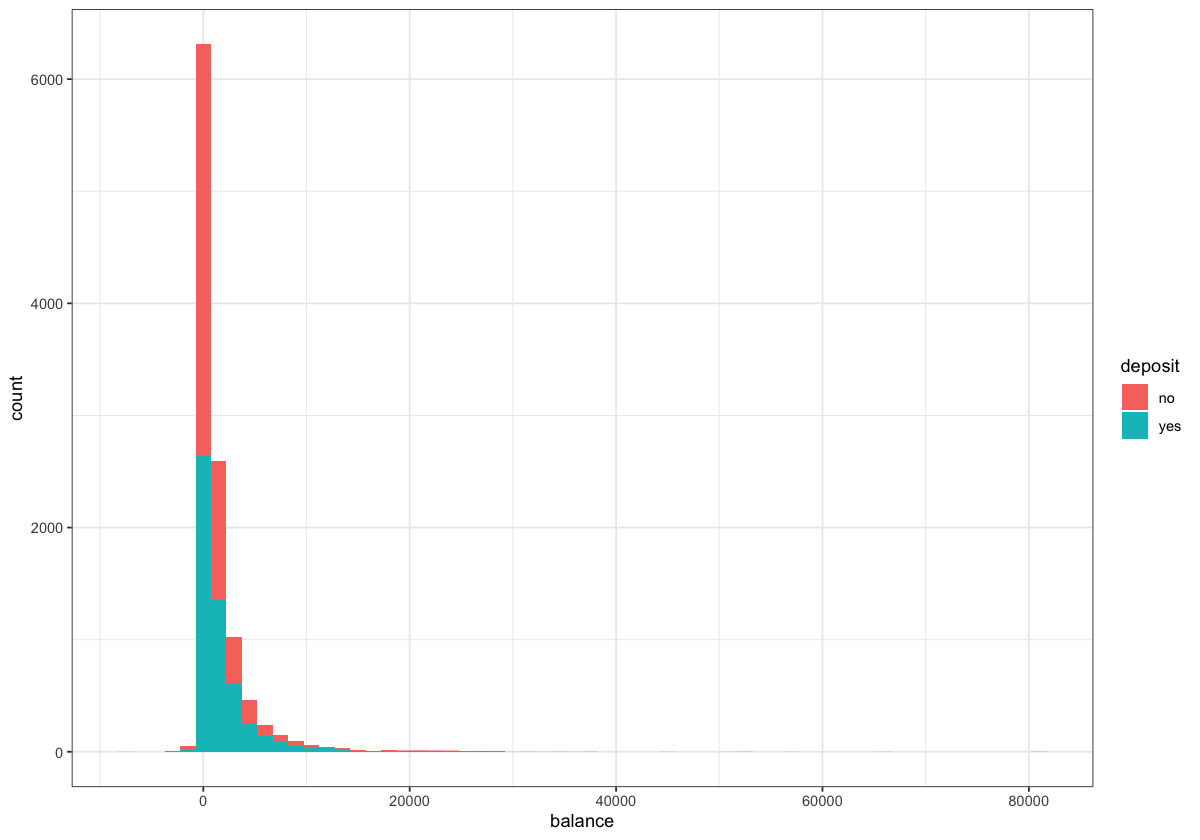

In [125]:
#proportion of balance and deposit subsciption
ggplot(bank,aes(x=balance,fill=deposit))+theme_bw()+geom_histogram(binwidth=1500)

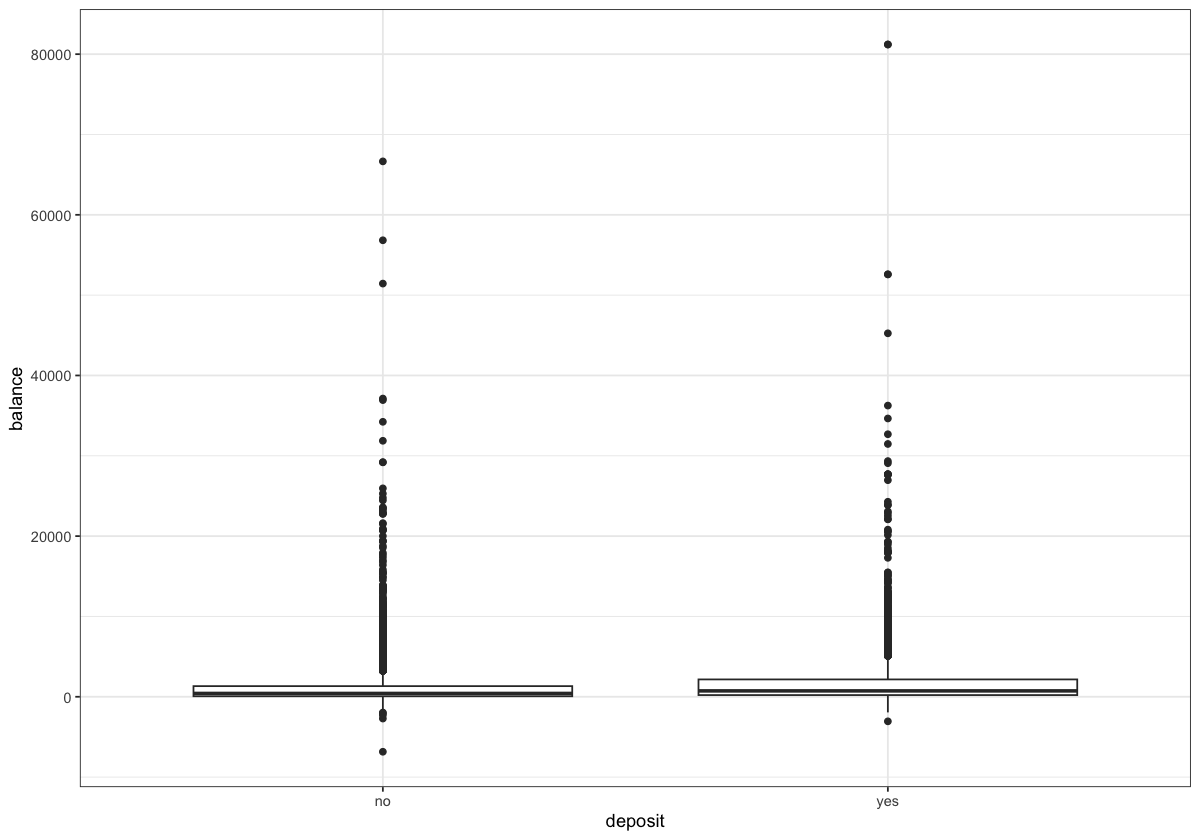

In [126]:
#boxplot of balance vs deposit
ggplot(bank,aes(x=deposit,y=balance))+theme_bw()+geom_boxplot()


Warning message:
“Use of `bank$deposit` is discouraged.
ℹ Use `deposit` instead.”
Warning message:
“Use of `bank$education` is discouraged.
ℹ Use `education` instead.”


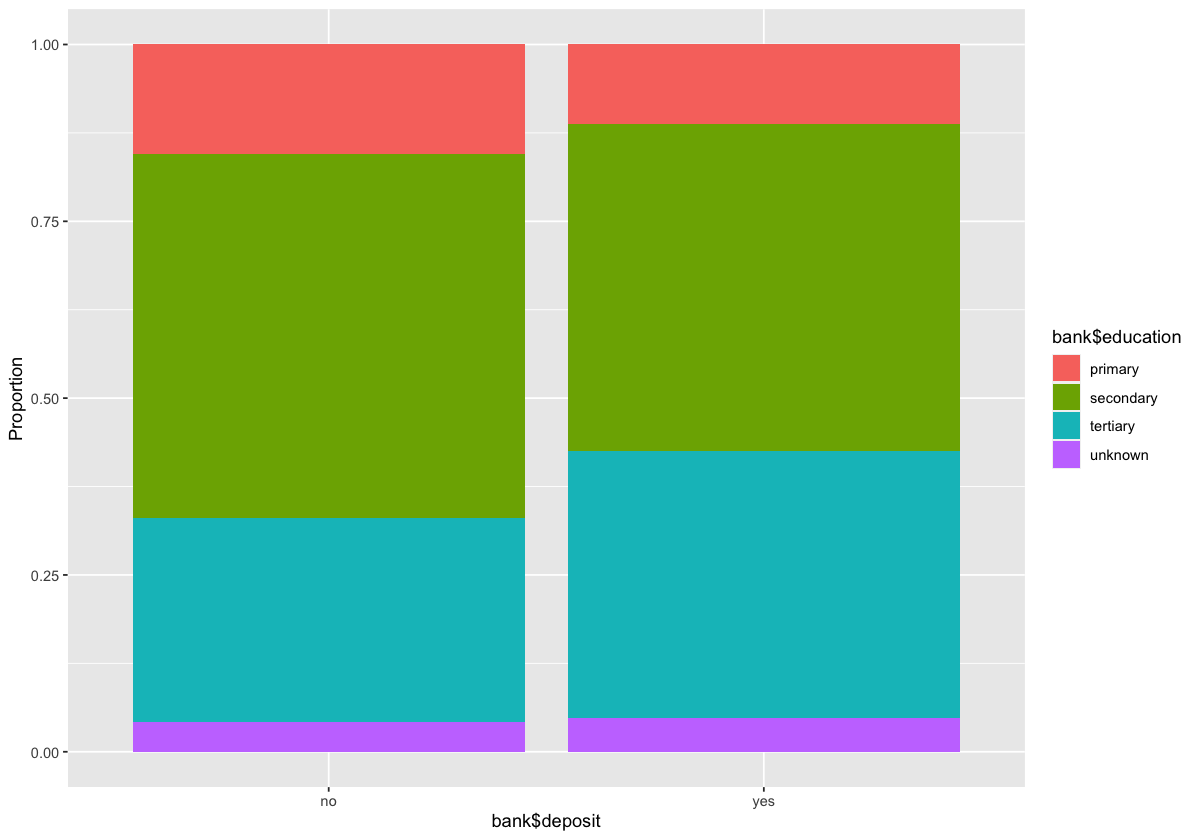

In [127]:
ggplot(bank, 
       aes(x = bank$deposit, 
           fill = bank$education)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion") 

Warning message:
“Use of `bank$deposit` is discouraged.
ℹ Use `deposit` instead.”
Warning message:
“Use of `bank$job` is discouraged.
ℹ Use `job` instead.”


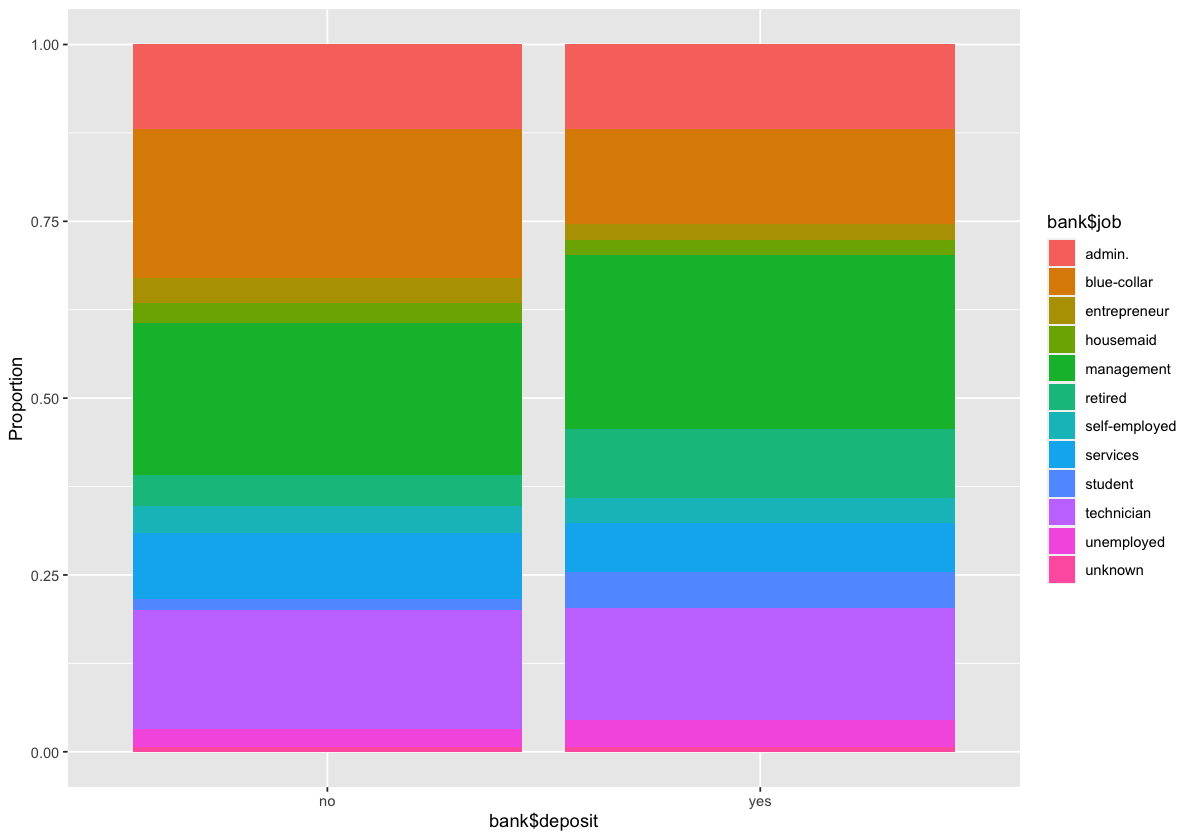

In [128]:
ggplot(bank, 
       aes(x = bank$deposit, 
           fill = bank$job)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

In [129]:
cross_plot(data=bank, target="deposit")

ERROR: Error in cross_plot(data = bank, target = "deposit"): could not find function "cross_plot"


In [130]:
set.seed(200)
index<-sample(nrow(bank),0.80*nrow(bank),replace = F)
train<-bank[index,]
test<-bank[-index,]

In [131]:
library(randomForest)
rf<-randomForest(deposit~.,data = train)
rf


Call:
 randomForest(formula = deposit ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 14.3%
Confusion matrix:
      no  yes class.error
no  3716  963  0.20581321
yes  314 3936  0.07388235

In [132]:
model<-c()
accuracy<-c()

In [149]:
prediction_rf<-predict(rf,test)

#confusion matrix to validate it
conf_mat<-confusionMatrix(prediction_rf,test$deposit)

model<-append(model,'randomforest')
accuracy<-append(accuracy,conf_mat$overall[1])


Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  986  75
       yes 208 964
                                          
               Accuracy : 0.8733          
                 95% CI : (0.8588, 0.8868)
    No Information Rate : 0.5347          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7474          
                                          
 Mcnemar's Test P-Value : 4.275e-15       
                                          
            Sensitivity : 0.8258          
            Specificity : 0.9278          
         Pos Pred Value : 0.9293          
         Neg Pred Value : 0.8225          
             Prevalence : 0.5347          
         Detection Rate : 0.4416          
   Detection Prevalence : 0.4751          
      Balanced Accuracy : 0.8768          
                                          
       'Positive' Class : no              
                              

In [150]:
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  986  75
       yes 208 964
                                          
               Accuracy : 0.8733          
                 95% CI : (0.8588, 0.8868)
    No Information Rate : 0.5347          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7474          
                                          
 Mcnemar's Test P-Value : 4.275e-15       
                                          
            Sensitivity : 0.8258          
            Specificity : 0.9278          
         Pos Pred Value : 0.9293          
         Neg Pred Value : 0.8225          
             Prevalence : 0.5347          
         Detection Rate : 0.4416          
   Detection Prevalence : 0.4751          
      Balanced Accuracy : 0.8768          
                                          
       'Positive' Class : no              
                              

In [134]:
d_tree<-rpart(deposit~.,data = train,method = "class")

In [151]:
d_tree<-rpart(deposit~.,data = test,method = "class")

In [152]:
prediction<-predict(d_tree,test,type = "class")
conf_mat<-confusionMatrix(prediction,test$deposit,positive = "yes")

model<-append(model,'decision_t/ree')
accuracy<-append(accuracy,conf_mat$overall[1])

In [153]:
#confusion matrix to validate it
conf_mat<-confusionMatrix(prediction,test$deposit)
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  987 163
       yes 207 876
                                          
               Accuracy : 0.8343          
                 95% CI : (0.8182, 0.8495)
    No Information Rate : 0.5347          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6679          
                                          
 Mcnemar's Test P-Value : 0.02539         
                                          
            Sensitivity : 0.8266          
            Specificity : 0.8431          
         Pos Pred Value : 0.8583          
         Neg Pred Value : 0.8089          
             Prevalence : 0.5347          
         Detection Rate : 0.4420          
   Detection Prevalence : 0.5150          
      Balanced Accuracy : 0.8349          
                                          
       'Positive' Class : no              
                              

In [137]:
Accuracy_table<-data.frame(model,accuracy)
Accuracy_table

model,accuracy
<chr>,<dbl>
randomforest,0.8732647
decision_t/ree,0.8374384
